## Analysis of Electricity Exchange 

This notebook shows how to use [utils function](https://github.com/corradio/electricitymap/tree/master/datascience#data-science). In particular we show how to pull data of electricity exchange. 

We first import `utils` function. This lets you access a set of handy functions : 

In [16]:
from utils import *
from ggplot import *

/Users/martin_daniel/venvs/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We then pull exchange data for France, between Nov. 2016 and Jan. 2017. To achieve this, we use the function `get_exchange` : 

In [ ]:
df_exchange = get_exchange(['FR'],'2016-11-01','2017-01-10')

Let's take a first look at the dataframe returned. In the example below, the first row means that France exported on Nov. 1st, 6260 MW to Germany. 

In [166]:
df_exchange.head()

,country_from,country_to,net_flow,timestamp
0,FR,DE,-6260.0,2016-11-01T00:00:00+00:00
1,FR,IT,-613.0,2016-11-01T00:00:00+00:00
2,FR,ES,2850.0,2016-11-01T00:00:00+00:00
3,FR,GB,1198.0,2016-11-01T00:00:00+00:00
0,FR,DE,-4618.0,2016-11-02T00:00:00+00:00


Let's run a quick analysis : on the above period, to which country France has exported the most ? From which country it has imported the most ? 

Looking at the table below, it looks like France has imported the most power from Belgium (71 154 MW), and has exported the most power to Spain (100 527 MW). 

In [172]:
df_exchange.groupby('country_to').sum().sort_values('net_flow',ascending=False)

,net_flow
country_to,
BE,71154.0
GB,31699.0
CH,5445.0
IT,-5891.0
DE,-21468.0
ES,-100527.0


How does this evolve in time ? In the graph below, we show how electricity exchanges have evolved from November to January. We notice for instance that import and export vary with a given country. 

For instance, France exported a lot of electricity to Germany during November, but started importing more in December : 

In [162]:
df_exchange['timestamp'] = df_exchange['timestamp'].apply(lambda x: arrow.get(x).datetime)

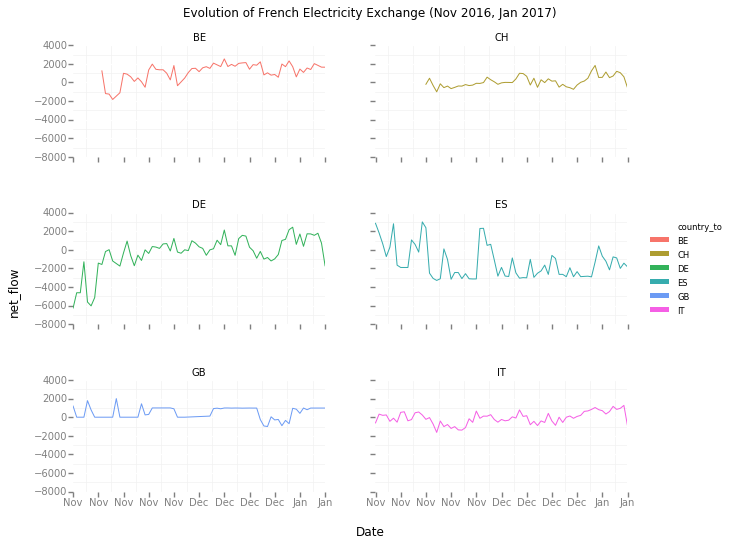

<ggplot: (317616925)>

In [163]:
ggplot(aes(x='timestamp',y='net_flow', colour='country_to'),data=df_exchange) +\
    geom_line() +\
    ggtitle('Evolution of French Electricity Exchange (Nov 2016, Jan 2017)') +\
    xlab('Date') +\
    scale_x_date(labels = date_format("%b")) +\
    facet_wrap('country_to') +\
    theme_bw()